## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [4]:

application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

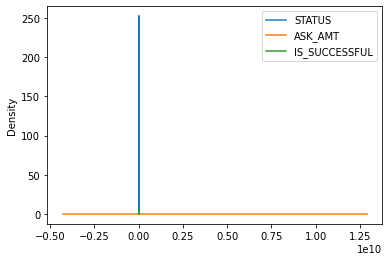

In [6]:
application_df.plot.density()

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
countsbinning = application_df['CLASSIFICATION'].value_counts()

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsclassification = countsbinning[countsbinning>1]
countsclassification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

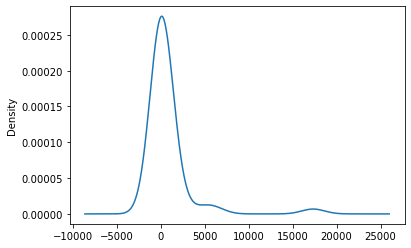

In [10]:
countsclassification.plot.density()

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list (countsbinning[countsbinning<100].index)
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y

# drop 'IS SUCCESSFUL'
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 350       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.5930 - accuracy: 0.7044 - val_loss: 0.5579 - val_accuracy: 0.7310
Epoch 2/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5613 - accuracy: 0.7235 - val_loss: 0.5488 - val_accuracy: 0.7349
Epoch 3/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.7248 - val_loss: 0.5486 - val_accuracy: 0.7357
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7251 - val_loss: 0.5461 - val_accuracy: 0.7362
Epoch 5/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7259 - val_loss: 0.5464 - val_accuracy: 0.7357
Epoch 6/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7273 - val_loss: 0.5464 - val_accuracy: 0.7339
Epoch 7/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7270 - val_loss: 0.5455 - val_accuracy: 0.7362

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5505 - accuracy: 0.7326 - 234ms/epoch - 874us/step
Loss: 0.5504564642906189, Accuracy: 0.7325947284698486


In [19]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")


### Attempt 2: Adding Additional neurons to hidden layers and additional layers are added 

In [20]:
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               5000      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 20)                1020      
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11,091
Trainable params: 11,091
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

Epoch 1/30
804/804 [==============================] - 3s 3ms/step - loss: 49118.8867 - accuracy: 0.5000
Epoch 2/30
804/804 [==============================] - 2s 2ms/step - loss: 17708.9883 - accuracy: 0.4940
Epoch 3/30
804/804 [==============================] - 2s 2ms/step - loss: 10245.1934 - accuracy: 0.4960
Epoch 4/30
804/804 [==============================] - 1s 2ms/step - loss: 9723.1680 - accuracy: 0.4972
Epoch 5/30
804/804 [==============================] - 2s 2ms/step - loss: 0.9640 - accuracy: 0.5318
Epoch 6/30
804/804 [==============================] - 1s 2ms/step - loss: 0.7195 - accuracy: 0.5318
Epoch 7/30
804/804 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5318
Epoch 8/30
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5318
Epoch 9/30
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 10/30
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - a

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6638 - accuracy: 0.5917 - 755ms/epoch - 3ms/step
Loss: 0.6638347506523132, Accuracy: 0.5917201042175293


In [25]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_A2.h5")

### Attempt 3: Changing activation function of output layer

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               5000      
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 20)                1020      
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 11,091
Trainable params: 11,091
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [30]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

Epoch 1/30
804/804 [==============================] - 4s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 2/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 3/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 4/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 5/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 6/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 7/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 8/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 9/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 10/30
804/804 [==============================] - 3s 3ms/step - loss: 8.2024 - accuracy: 0.4682

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 8.2422 - accuracy: 0.4657 - 1s/epoch - 4ms/step
Loss: 8.242232322692871, Accuracy: 0.46565598249435425


In [32]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [ ]:
# 'worked with TA's and Other students to develop code and also looked some stuff up onon stackoverflow to help me find the answers need to get the right idea going'